In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

In [40]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_names]) 

In [42]:
# Perform PCA
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(X_scaled)

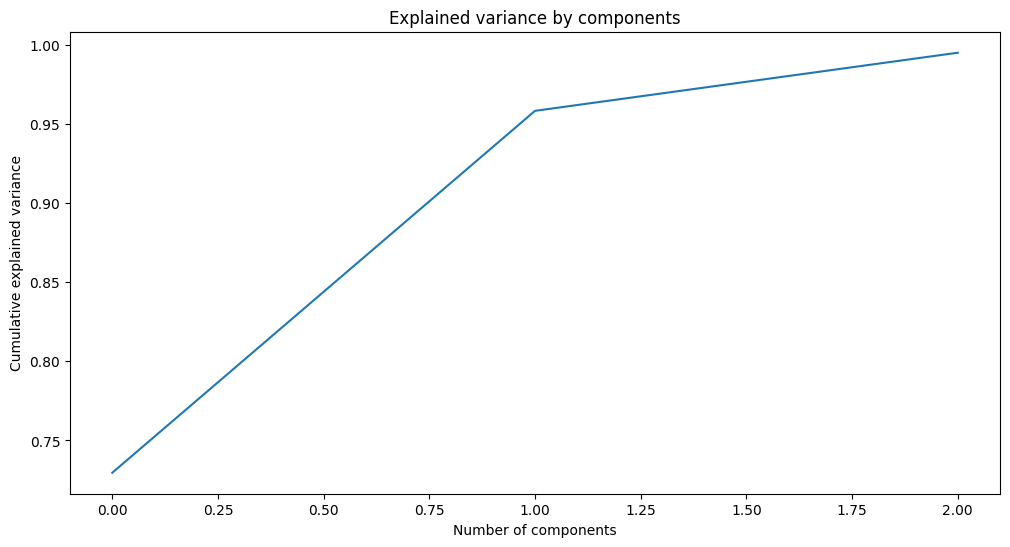

In [43]:
# Plot the explained variance ratio
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by components')
plt.show()

In [44]:
# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
df_pca['Target'] = df['Target'] 

print(df_pca.shape)
df_pca.head()

(150, 4)


,Principal Component 1,Principal Component 2,Principal Component 3,Target
0,-2.264703,0.480027,0.127706,0
1,-2.080961,-0.674134,0.234609,0
2,-2.364229,-0.341908,-0.044201,0
3,-2.299384,-0.597395,-0.091290,0
4,-2.389842,0.646835,-0.015738,0


In [45]:
# Create a 3D scatter plot using Plotly
fig_3d = px.scatter_3d(df_pca, x='Principal Component 1', y='Principal Component 2', z='Principal Component 3', color='Target',
                        title='3D PCA of Iris Dataset', labels={'Principal Component 1': 'PC1', 
                                                                   'Principal Component 2': 'PC2', 
                                                                   'Principal Component 3': 'PC3'},
                        color_continuous_scale=px.colors.sequential.Viridis)
fig_3d.show()